In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Lets take a very simple function

In [3]:
def f(x):
    return 3*(x**2) - 4*x + 5

In [4]:
f(3.0)

20.0

In [5]:
xs = np.arange(-5,5,0.25)
xs

array([-5.  , -4.75, -4.5 , -4.25, -4.  , -3.75, -3.5 , -3.25, -3.  ,
       -2.75, -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75,
       -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,
        1.75,  2.  ,  2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,
        4.  ,  4.25,  4.5 ,  4.75])

In [6]:
ys = f(xs)
ys

array([100.    ,  91.6875,  83.75  ,  76.1875,  69.    ,  62.1875,
        55.75  ,  49.6875,  44.    ,  38.6875,  33.75  ,  29.1875,
        25.    ,  21.1875,  17.75  ,  14.6875,  12.    ,   9.6875,
         7.75  ,   6.1875,   5.    ,   4.1875,   3.75  ,   3.6875,
         4.    ,   4.6875,   5.75  ,   7.1875,   9.    ,  11.1875,
        13.75  ,  16.6875,  20.    ,  23.6875,  27.75  ,  32.1875,
        37.    ,  42.1875,  47.75  ,  53.6875])

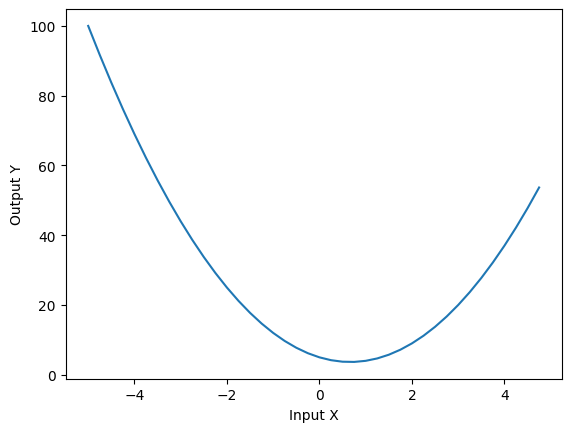

In [8]:
plt.plot(xs,ys)
plt.xlabel("Input X")
plt.ylabel("Output Y")
plt.show()

# Derivativs demo

In [11]:
h = 0.00001 # very small number
x = 3.0

print(f(x), f(x+h))

20.0 20.0001400003


In [12]:
derivative = (f(x + h) - f(x))/h

# print slope
print(derivative)

14.00003000000538


In [13]:
h = 0.00001 # very small number
x = - 3.0

print(f(x), f(x+h))
derivative = (f(x + h) - f(x))/h
print(derivative)

44.0 43.9997800003
-21.999970000052823


In [14]:
h = 0.00001 # very small number
x = 2.0/3.0

print(f(x), f(x+h))
derivative = (f(x + h) - f(x))/h
print(derivative)

3.666666666666667 3.666666666966667
3.0000002482211127e-05


# Lets look a complex case


In [15]:
a = 2.0
b = -3.0
c = 10.0

d = a*b +c
print(d)

4.0


In [17]:
h = 0.00001

# inputs (points at which I want to see the derivative of d w.r.t. a, b and c)
a = 2.0
b = -3.0
c = 10.0

d1 = a*b +c # value of function without delta
a = a + h
d2 = a*b + c # same function (this time updated a is passing)(dd/da)
print('d1',d1)
print('d2',d2)
print('slope(derivative)', (d2-d1)/h)

d1 4.0
d2 3.9999699999999994
slope(derivative) -3.000000000064062


In [18]:
h = 0.00001

# inputs (points at which I want to see the derivative of d w.r.t. a, b and c)
a = 2.0
b = -3.0
c = 10.0

d1 = a*b +c # value of function without delta
b = b + h
d2 = a*b + c # same function (this time updated b is passing)(dd/db)
print('d1',d1)
print('d2',d2)
print('slope(derivative)', (d2-d1)/h)

d1 4.0
d2 4.00002
slope(derivative) 2.0000000000131024


In [19]:
h = 0.00001

# inputs (points at which I want to see the derivative of d w.r.t. a, b and c)
a = 2.0
b = -3.0
c = 10.0

d1 = a*b +c # value of function without delta
c = c + h
d2 = a*b + c # same function (this time updated c is passing) (dd/dc)
print('d1',d1)
print('d2',d2)
print('slope(derivative)', (d2-d1)/h)

d1 4.0
d2 4.00001
slope(derivative) 0.9999999999621422


# Build Data Structures

In [137]:
import nn_visualize as V

class Value:

    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.grad = 0.0
        self._prev = set(_children) # pointers (which objects created this object)
        self._op = _op # operation (Which operation created this object)
        self.label = label
        self._backward = lambda:None
    
    def __repr__(self) -> str:
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        _out = Value(self.data + other.data, _children=(self, other), _op = '+')

        def _backward():
            self.grad += 1.0 * _out.grad # gradient of self with self * output gradient propogated by addition
            other.grad += 1.0 * _out.grad # gradient of other with other * output gradient propogated by addition
        _out._backward = _backward
        return _out
    
    def __mul__(self, other):
        _out = Value(self.data * other.data, _children=(self, other), _op = '*')

        def _backward():
            self.grad += other.data * _out.grad
            other.grad += self.data * _out.grad
        _out._backward = _backward
        return _out
    
    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1) / (math.exp(2*x) + 1)
        _out = Value(t, (self,), 'tanh')

        def _backward():
            self.grad += (1 - (_out.data)**2) * _out.grad
        _out._backward = _backward

        return _out

    def backward(self):
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)

        build_topo(self)
        
        self.grad = 1.0
        for node in reversed(topo):
            node._backward()
    






a = Value(2.0, label='a')
b = Value(-3.0, label='b')
print(a)
print(b)
print(a+b) # a.__add__(b)
print(a*b) # a.__mul__(b)


Value(data=2.0)
Value(data=-3.0)
Value(data=-1.0)
Value(data=-6.0)


In [72]:
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')

e = a * b; e.label = 'e'

d = e + c; d.label = 'd'

f = Value(-2.0, label='f')

L = d * f ; L.label = 'L'


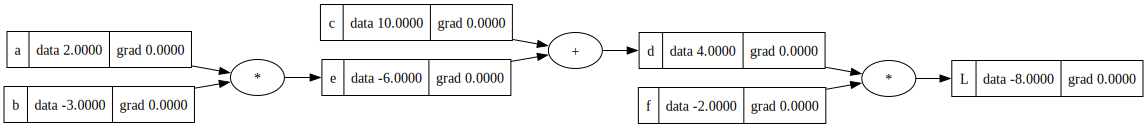

In [73]:
V.draw_dot(L)

In [47]:

# Derivative of L wrt a (dL/da)
def lol():
    h = 0.0001
    # calculate derivative of L wrt a
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a * b; e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d * f ; L.label = 'L'
    L1= L


    a = Value(2.0 + h, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a * b; e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d * f ; L.label = 'L'
    L2 = L

    print('L1',L1,'L2',L2,'slope(derivative)',(L2.data-L1.data)/h)

lol()

L1 Value(data=-8.0) L2 Value(data=-7.999399999999998) slope(derivative) 6.000000000021544


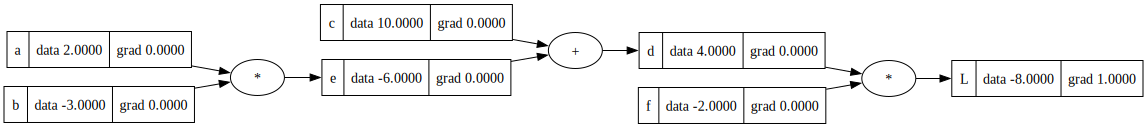

In [74]:
L.grad = 1.0 # dL/dL = 1.0 (derivative of loss against itself)

V.draw_dot(L)

L = d * f <br>
dL / dd = ? # from calculus we know that this should be = f

and

dL / df = ? # from calculus we know that this should be = d

In [75]:
# so lets set these values in grad (impact of this variable in final gradient(loss L))
d.grad = -2.0 # dL/dd = f = -2.0
f.grad = 4.0  # dL/df = d = 4.0

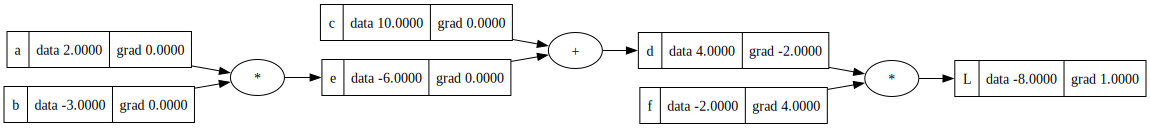

In [76]:
V.draw_dot(L)

# Most imp part of this notebook

we need to calculate dL / dc

#### This is done using chain rule

![title](../../images/dl_by_dd_small.jpg)

so, dL / de = (dL / dd) * (dd/de) <br>

dL / dd = f  = -2.0 # from last step  <br>
dd/de = 1 (from image)

dL / de = (-2.0 * 1) = -2.0 (this is e.grad)

similarly, <br>

dL/dc = dL/dd * dd/ dc = (-2.0 * 1.0) = -2.0 (this is c.grad)


In [77]:
c.grad = -2.0 # impact of c on L
e.grad = -2.0 # impact of e on L

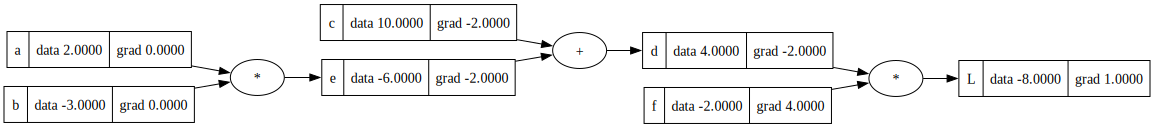

In [78]:
V.draw_dot(L)

If you carefully notice above, + sign is just passing on gradients 

so dL / de = -2.0 <br>


e = a * b <br>
de / da = b <br>
de / db = a <br>

dL / da = (de/da) * (dL / de) = (b) * (-2.0) = (-3.0) * (-2.0) = 6.0 # a.grad = 6.0 <br>
dL / db = (de/db) * (dL / de) = (a) * (-2.0) = (2.0) * (-2.0) = -4.0 # b.grad = -4.0 <br>



In [79]:
a.grad = 6.0
b.grad = -4.0

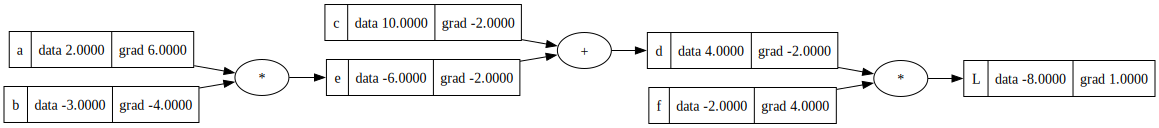

In [80]:
V.draw_dot(L)

This is all what backpropogation is. Now lets change the value of individual nodes to change L

Value(data=-1.5360000000000014)


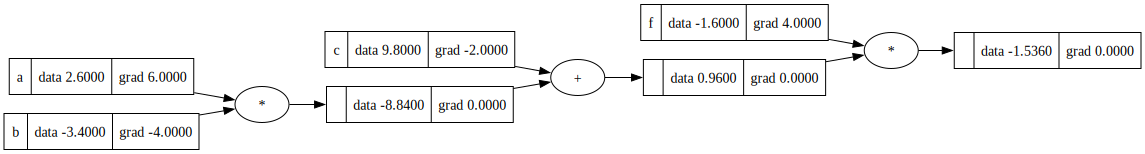

In [81]:
# Say that we want the L.data to go up (increase loss) 
# so we need to increase the value of each node by a small quantity in direction of gradient (slope)

a.data = a.data + (0.1 * a.grad) # this 0.01 is learning rate
b.data = b.data + (0.1 * b.grad)
c.data = c.data + (0.1 * c.grad)
f.data = f.data + (0.1 * f.grad)

# now Lets run the forward pass

e = a * b
d = e + c
L = d * f

# Here we expect loss to increase 
print(L)
V.draw_dot(L)

So Loss increase from -8.0 to -1.5 . We can try by increasing by learning rate

In [66]:

# Derivative of L wrt f (dL/dd)
def lol():
    h = 0.0001
    # calculate derivative of L wrt a
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a * b; e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d * f ; L.label = 'L'
    L1= L.data


    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    b.data +=h
    c = Value(10.0, label='c')
    e = a * b; e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d * f ; L.label = 'L'
    L2 = L.data

    print('L1',L1,'L2',L2,'slope(derivative)',(L2-L1)/h)

lol()

L1 -8.0 L2 -8.0004 slope(derivative) -4.000000000008441


# Tanh activation function

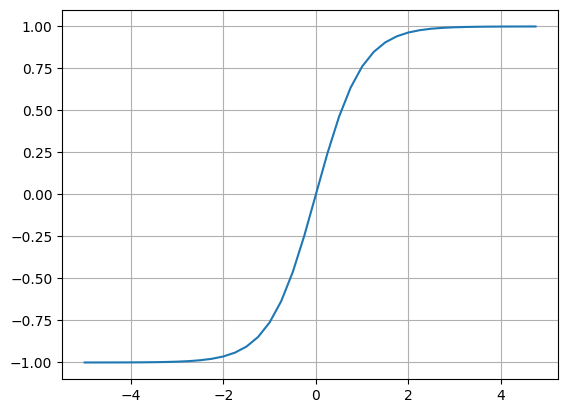

In [85]:
data = np.arange(-5,5,0.25)
plt.plot(
    data,
    np.tanh(data)
)
plt.grid()
plt.show()


In [138]:

# inputs
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# weights
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

# bias of neuron
b = Value(6.8813735870, label='b')

x1w1 = x1 * w1 ; x1w1.label='x1*w1'
x2w2 = x2 * w2 ; x2w2.label='x2*w2'

x1w1_plus_x2w2 = x1w1 + x2w2; x1w1_plus_x2w2.label = 'x1*w1 + x2*w2'
n = x1w1_plus_x2w2 + b; n.label = 'n' # output of neuron before activation

o = n.tanh(); o.label = 'o'

o.backward()

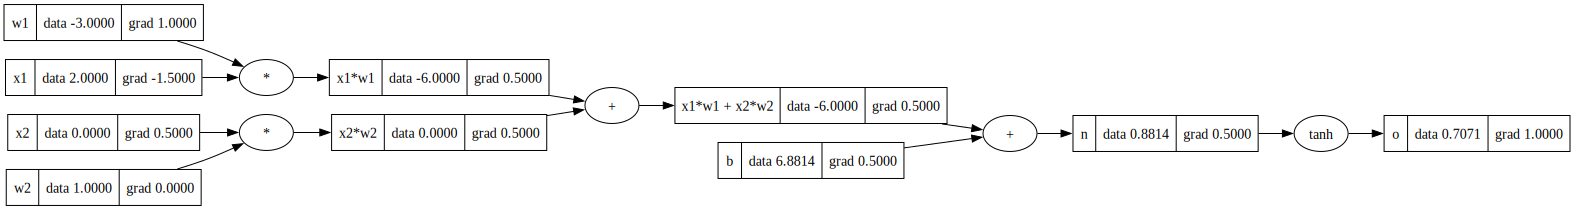

In [139]:
V.draw_dot(o)

# Lets backpropogate

(all the code below is moved to value class)

In [131]:
# need to remove all these backward calls
# topological sort
o.grad = 1.0
topo = []
visited = set()
def build_topo(v):
    if v not in visited:
        visited.add(v)
        for child in v._prev:
            build_topo(child)
        topo.append(v)

build_topo(o)


for node in reversed(topo):
    node._backward()

In [126]:
x1w1._backward()
x2w2._backward()

In [124]:
x1w1_plus_x2w2._backward()

In [122]:
n._backward()

In [120]:
# moving all  the manual backpropogation code in Value class now

o.grad = 1.0
o._backward()

In [110]:
# now comes multiplication
# x1.grad = do/dx1 = x1w1.grad * dw1x1/dx = x1w1.grad * w1 = 0.5 * (-3.0)
x1.grad = 0.5 * (-3.0)
# similarly
w1.grad = 0.5 * 2.0
x2.grad = 0.5 * 1.0
w2.grad = 0.5 * 0.0

In [108]:
# again + sign copies the gradients
x1w1.grad = 0.5
x2w2.grad = 0.5

In [106]:
# + sign just copies the gradients
x1w1_plus_x2w2.grad = 0.5
b.grad = 0.5

In [105]:
# derivative of tanh(x) = 1- (tanh(x))**2

# tanh(n) = o
# do / dn = d(tanh(n))/dn = 1 - (tanh(n))**2
# o = tanh(n)
# so 
# do/dn = 1 - o ** 2
# n.grad = 1- o.data ** 2
n.grad = 1 - o.data ** 2

In [104]:
o.grad = 1.0

# Special Case of backpropogation

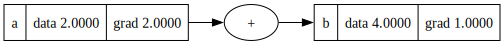

In [140]:
a = Value(2.0, label='a')

b = a + a ; b.label = 'b'
b.backward()
V.draw_dot(b)

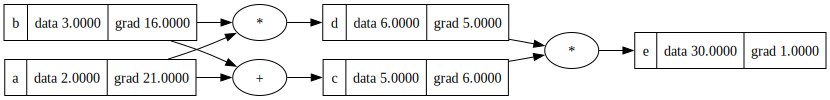

In [143]:
a = Value(2.0, label='a')
b = Value(3.0, label='b')

c = a + b; c.label = 'c'
d = a * b; d.label = 'd'

e = c * d; e.label = 'e'


e.backward()
V.draw_dot(e)